# Hanh Hoang - 91040
Date: 01 Dec 2023<br>
Final test - Statistics <br>
Metropolia University of Applied Sciences

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import linregress
import numpy.random as rng

## Problem 1

In [2]:
# (a) Descriptive statistics
data1 = pd.read_csv('data29444.csv')
x = data1['x']
x.describe()

count     30.000000
mean     200.993000
std        1.370739
min      198.000000
25%      200.265000
50%      200.900000
75%      201.900000
max      203.480000
Name: x, dtype: float64

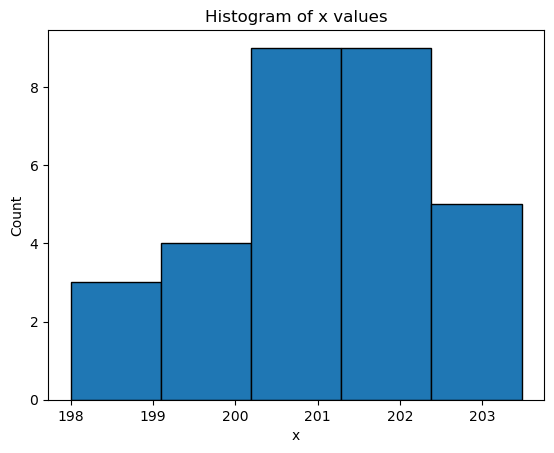

Average transmission time of signal: 200.99
standard deviation: 1.37
Values are within the range from 198.0 to 202.0: 23


In [3]:
# (b) Histogram
plt.hist(x, bins = 5, edgecolor = 'black')
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histogram of x values')
plt.show()

mean = x.mean()
print(f'Average transmission time of signal: {mean:.2f}')

std = x.std()
print(f"standard deviation: {std:.2f}")

in_range = (x >= 198.0) & (x <= 202.0)
total = sum(in_range)
print(f"Values are within the range from 198.0 to 202.0: {total}")

**Answers:** <br>
(c) Average transmission time of signal is 200.99 <br>
(d) Standard deviation is 1.37<br>
(e) Number of values are within the range from 198.0 to 202.0: 23<br>

## Problem 2

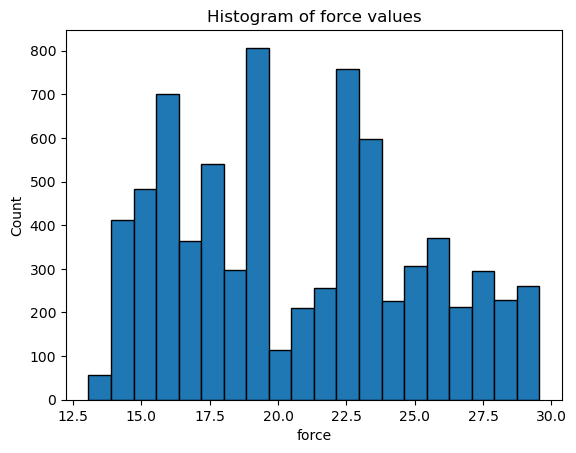

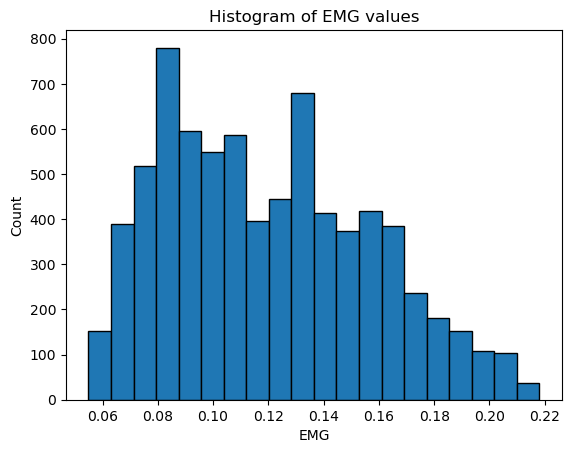

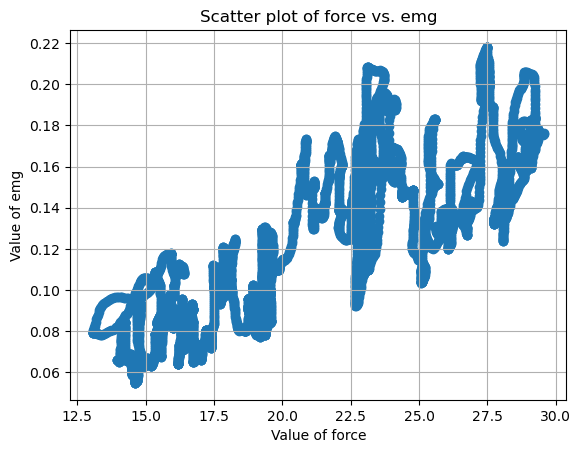

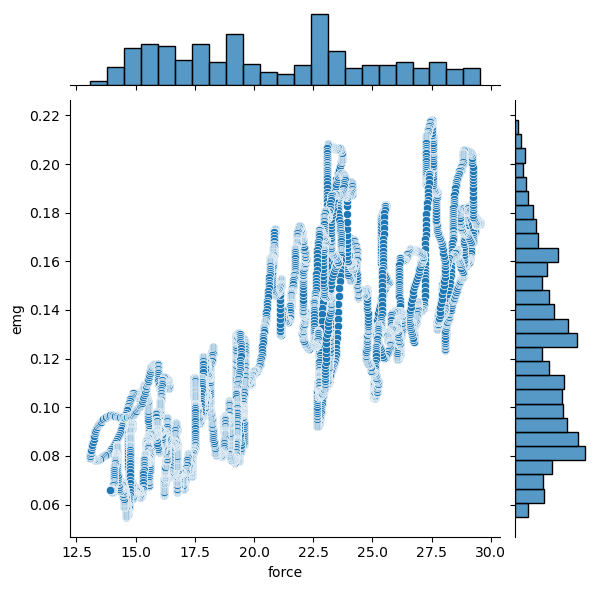

,force,emg
count,7500.000000,7500.000000
mean,20.798627,0.119909
std,4.370122,0.037036
min,13.063622,0.054914
25%,16.725731,0.088071
50%,20.361682,0.115684
75%,23.927879,0.146767
max,29.560552,0.218078


In [4]:
# (a) Histograms
data2 = pd.read_csv('emg3219.csv')
force = data2['force']
emg = data2['emg']

#histogram of force
plt.hist(force, bins = 20, edgecolor = 'black')
plt.xlabel('force')
plt.ylabel('Count')
plt.title('Histogram of force values')
plt.show()

#histogram of emg
plt.hist(emg, bins = 20, edgecolor = 'black')
plt.xlabel('EMG')
plt.ylabel('Count')
plt.title('Histogram of EMG values')
plt.show()

#Scattergram of force and EMG. x=force, y=emg
plt.scatter(force, emg)
plt.title('Scatter plot of force vs. emg')
plt.xlabel('Value of force')
plt.ylabel('Value of emg')
plt.grid()
plt.show()

#using sns to draw both histograms and scattergram
x = data2['force']
y = data2['emg']
sns.jointplot(data = data2, x = 'force', y = 'emg')
plt.show()

#Descriptive statistics
data2.describe()


In [5]:
# (c) Correlation
variables = ['force', 'emg']
data2[variables].corr()

,force,emg
force,1.000000,0.812136
emg,0.812136,1.000000


In [6]:
# (b) and (d) Scattergram and best fitting linear regression
x = data2['force']
y = data2['emg']
r = linregress(x,y)
print(r)

LinregressResult(slope=0.006882707822746564, intercept=-0.023241766023191404, rvalue=0.8121361066292868, pvalue=0.0, stderr=5.710509557247076e-05, intercept_stderr=0.001213638854006602)


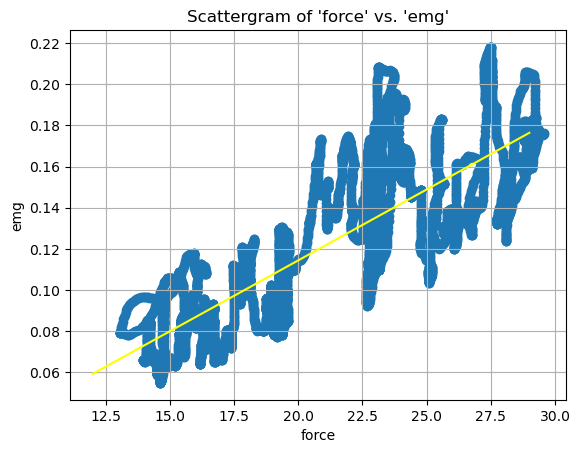

In [7]:
x2 = np.arange(12, 30)
y2 = r.slope * x2 + r.intercept
plt.scatter(x,y)
plt.plot(x2, y2, color= 'yellow')
plt.title(f"Scattergram of 'force' vs. 'emg'")
plt.xlabel('force')
plt.ylabel('emg')
plt.grid()
plt.show()

**Interpretation:**<br>

* (e) According to scattergram, there's linear correlation between 2 variables: clench force and muscle electric activity(emg). Even though there's big range difference of EMG with a certain force, it can still be concluded that with lower force there's tendency of lower emg and if there's the higher applied force it's expected to be higher emg<br>

## Problem 3

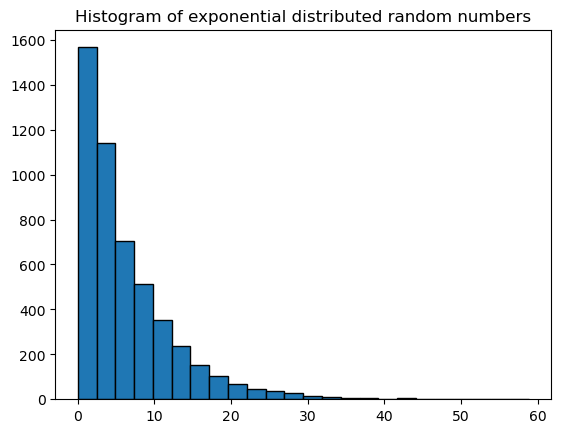

Descriptive statistics of exponential distributed random values:
count    5000.000000
mean        6.354710
std         6.342304
min         0.000330
25%         1.902635
50%         4.350756
75%         8.820516
max        58.818745
dtype: float64
Mean value: 6.35
The proportion of the values that are less than mean value: 0.632
The proportion of the values that are between 1.84 and 8.87: 0.508
The value for 95% percentile:
0.95    18.960956
dtype: float64


In [8]:
# My code
sample_size = 5000
scale = 6.4
rand = rng.default_rng(12345)
x_expo = rand.exponential(scale, sample_size)
plt.hist(x_expo, bins = np.linspace(x_expo.min(), x_expo.max(), 25), edgecolor = 'black')
plt.title('Histogram of exponential distributed random numbers')
plt.show()

#Descriptive statistics
d_exponential = pd.Series(x_expo).describe()
print("Descriptive statistics of exponential distributed random values:")
print(d_exponential)

#Calculate proportion of values are less than mean value
mean_value = pd.Series(x_expo).mean()
print(f"Mean value: {mean_value:.2f}")
p1 = (x_expo < mean_value).sum()/pd.Series(x_expo).count()
print(f"The proportion of the values that are less than mean value: {p1}")

#Calculate the proportion of values are between 1.84 and 8.87
range_p2 = (x_expo >= 1.84) & (x_expo <= 8.87)
p2 = sum(range_p2)/sample_size
print(f"The proportion of the values that are between 1.84 and 8.87: {p2:.3f}")

#Calculate the value for 95% percentile
percentile = pd.Series(x_expo).quantile([0.95])
print("The value for 95% percentile:")
print(percentile)

**Answers:**<br>

aaa) The proportion of the values that are less than mean value: 0.632 (63.2%)<br>
bbb) The proportion of the values that are between 1.84 and 8.87: 0.508 (50.8%)<br>
ccc) The value for 95% percentile: 18.96


## Problem 4

Correlation between time and all heart rate detection devices using in study:
               time  cosinuss    garmin     polar  firstbeat
time       1.000000  0.562825  0.737228  0.712913   0.711379
cosinuss   0.562825  1.000000  0.790011  0.791201   0.792509
garmin     0.737228  0.790011  1.000000  0.966080   0.963841
polar      0.712913  0.791201  0.966080  1.000000   0.995772
firstbeat  0.711379  0.792509  0.963841  0.995772   1.000000


Descriptive statistics of the data:
              time     cosinuss       garmin        polar    firstbeat
count  1710.000000  1710.000000  1710.000000  1710.000000  1710.000000
mean    944.500000   110.016374   120.411111   118.685380   118.097661
std     493.778797    26.974074    23.838348    23.354278    23.337284
min      90.000000    26.000000    84.000000    76.000000    74.000000
25%     517.250000    90.000000    95.000000    94.000000    94.000000
50%     944.500000   111.000000   124.000000   121.000000   121.000000
75%    1371.750000   

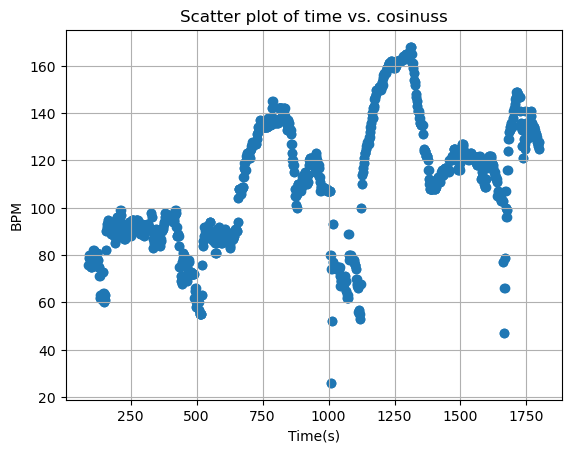

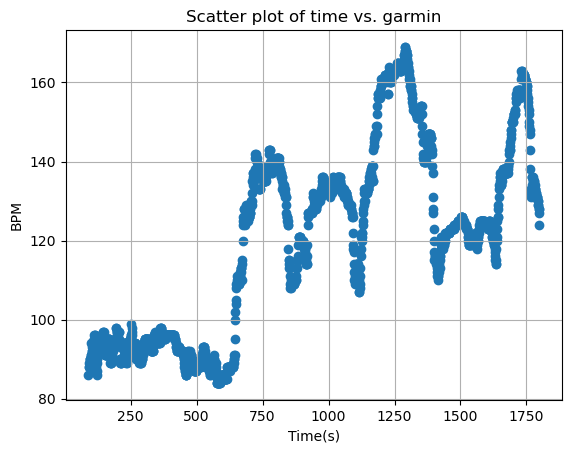

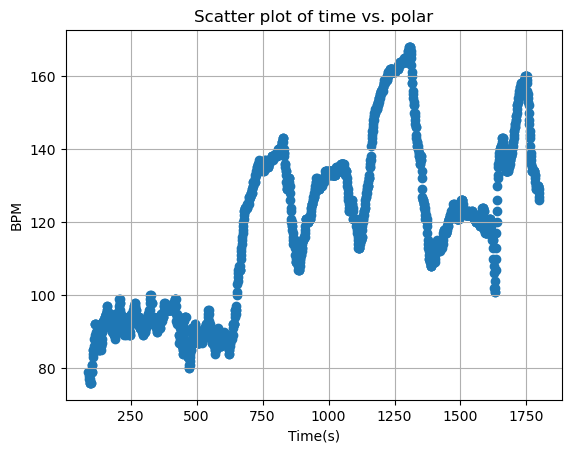

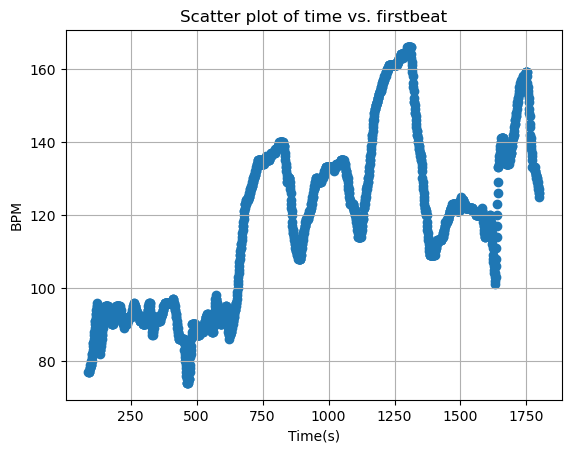

In [9]:
# My code
data4 = pd.read_csv('heartrate732.csv')
time = data4['time']
cosinuss = data4['cosinuss']
garmin = data4['garmin']
polar = data4['polar']
firstbeat = data4['firstbeat']

#Correlation statistics
variables_data4 = ['time', 'cosinuss', 'garmin', 'polar', 'firstbeat']
print("Correlation between time and all heart rate detection devices using in study:")
print(data4[variables_data4].corr())

#Descriptive statistics
print("\n\nDescriptive statistics of the data:")
print(data4.describe())

#Scattergram of devices and time

plt.scatter(time, cosinuss)
plt.title('Scatter plot of time vs. cosinuss')
plt.xlabel('Time(s)')
plt.ylabel('BPM')
plt.grid()
plt.show()

plt.scatter(time, garmin)
plt.title('Scatter plot of time vs. garmin')
plt.xlabel('Time(s)')
plt.ylabel('BPM')
plt.grid()
plt.show()

plt.scatter(time, polar)
plt.title('Scatter plot of time vs. polar')
plt.xlabel('Time(s)')
plt.ylabel('BPM')
plt.grid()
plt.show()

plt.scatter(time, firstbeat)
plt.title('Scatter plot of time vs. firstbeat')
plt.xlabel('Time(s)')
plt.ylabel('BPM')
plt.grid()
plt.show()


**Explanation:**<br>

From scattergram, it shows that among all devices, there's correlation between time and each of heart rate detection device, in which the cosinuss has lowest correlation. It's expected that the longer time of exercise, the higher BPM rate measured. Witt correlation statistics, it provides clearly the correlation between each device vs. time is different.  Garmin has the highest correlation between time and heartrate BPM with correlation value: 0.737, followed by polar with 0.713, firstbeat with correlation of 0.712 and the least correlation is cosinuss (0.563)
Therefore, rank the device from most reliable to least reliable:<br>
1. garmin<br>
2. polar <br>
3. firstbeat <br>
4. cosinuss